# Test the Simple atmospheric differential transparency Emulator 

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/10/26
- last update : 2023/10/29


- This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

- It is implemented in jax for auto differentiation

- access to data see https://setuptools.pypa.io/en/latest/userguide/datafiles.html

In [1]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import os
import seaborn as sns

In [2]:
from diffemulator.diffemulator_interpax  import SimpleDiffAtmEmulator,final_path_data
from diffemulator.diffemulator_interpax  import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Check emulator

In [5]:
site = 'LSST'
emul  = SimpleDiffAtmEmulator(obs_str=site)
path = final_path_data

Observatory LSST found in preselected observation sites


In [6]:
WL = emul.GetWL()

In [7]:
airmasses = emul.AIRMASS
NAM = len(airmasses)

In [8]:
hls_colors = sns.color_palette("hls", NAM)
#sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

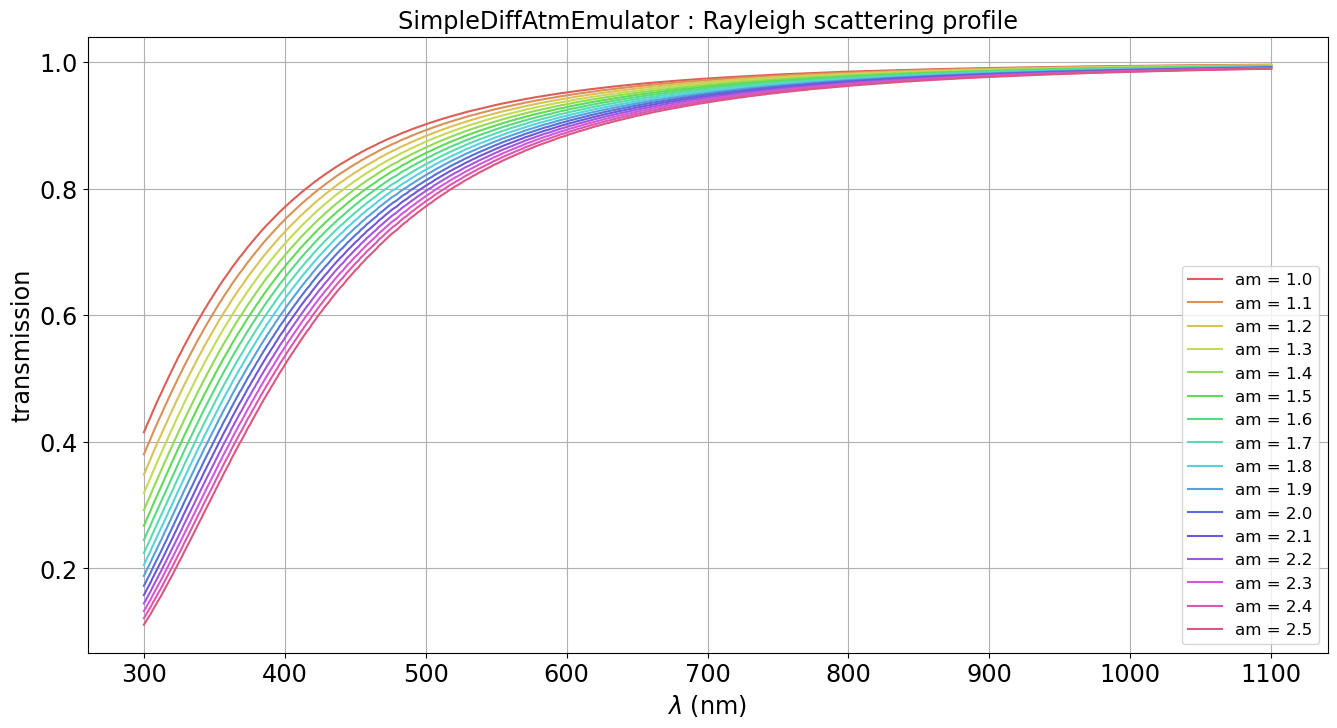

In [9]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    label = f"am = {am:.1f}" 
    transm = emul.GetRayleighTransparency1DArray(WL,am)
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
title = f"SimpleDiffAtmEmulator : Rayleigh scattering profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with Oxygen O2 absorption

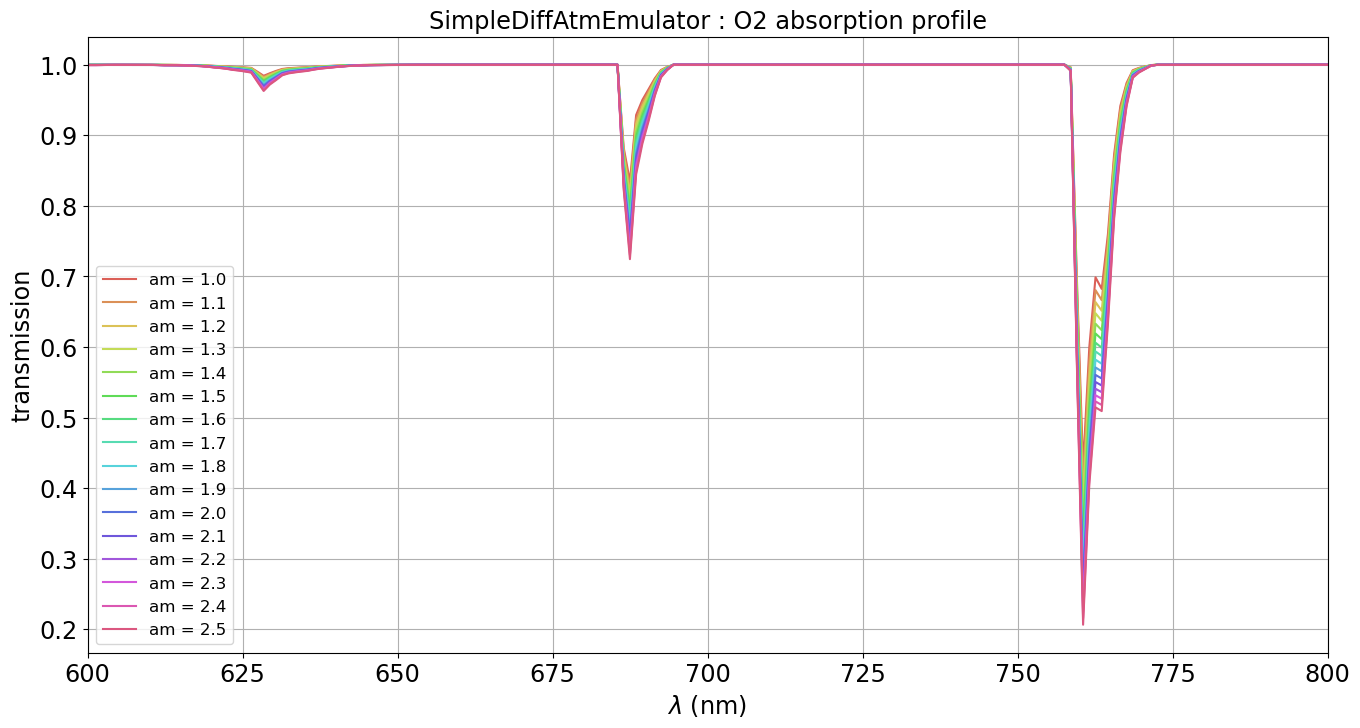

In [10]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    transm = emul.GetO2absTransparency1DArray(WL,am)
    label = f"am = {am:.1f}" 
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
title = f"SimpleDiffAtmEmulator : O2 absorption profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,800.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with PWV absorption

In [11]:
pwvs = emul.PWV
NPWV=len(pwvs)

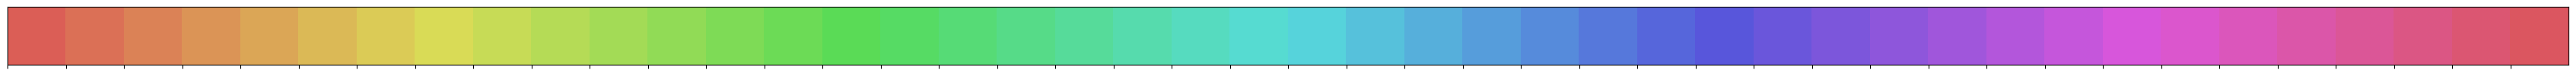

In [12]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


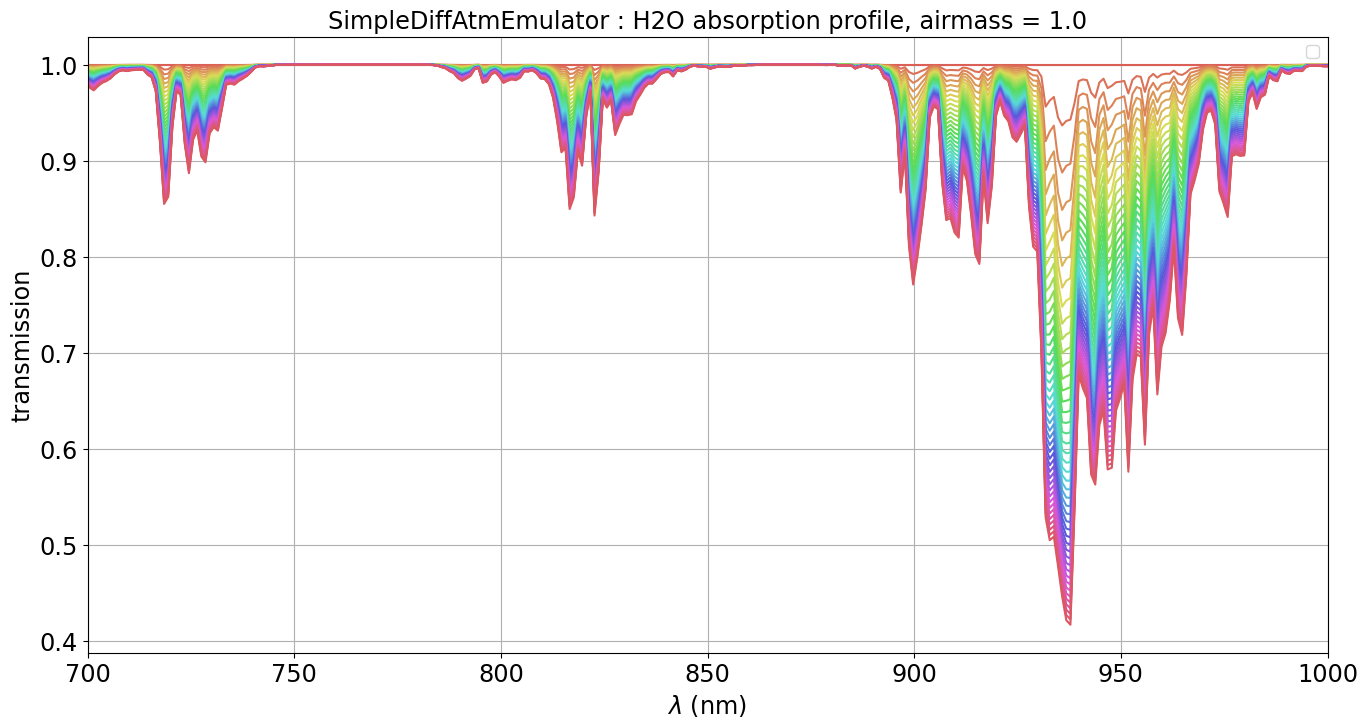

In [13]:
am = 1
fig, ax = plt.subplots()

for idx,pwv in enumerate(pwvs):
    am_arr = jnp.array([am])
    pwv_arr = jnp.array([pwv])
    transm = emul.GetPWVabsTransparency1DArray(WL,am,pwv)
    ax.plot(WL,transm,color=hls_colors[idx])
    
title = f"SimpleDiffAtmEmulator : H2O absorption profile, airmass = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with Ozone absorption

In [14]:
ozs = emul.OZ
NOZ = len(ozs)

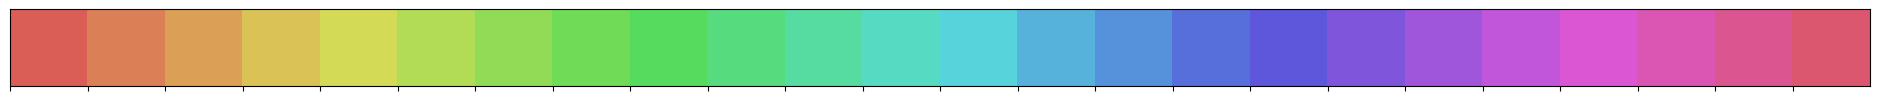

In [15]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


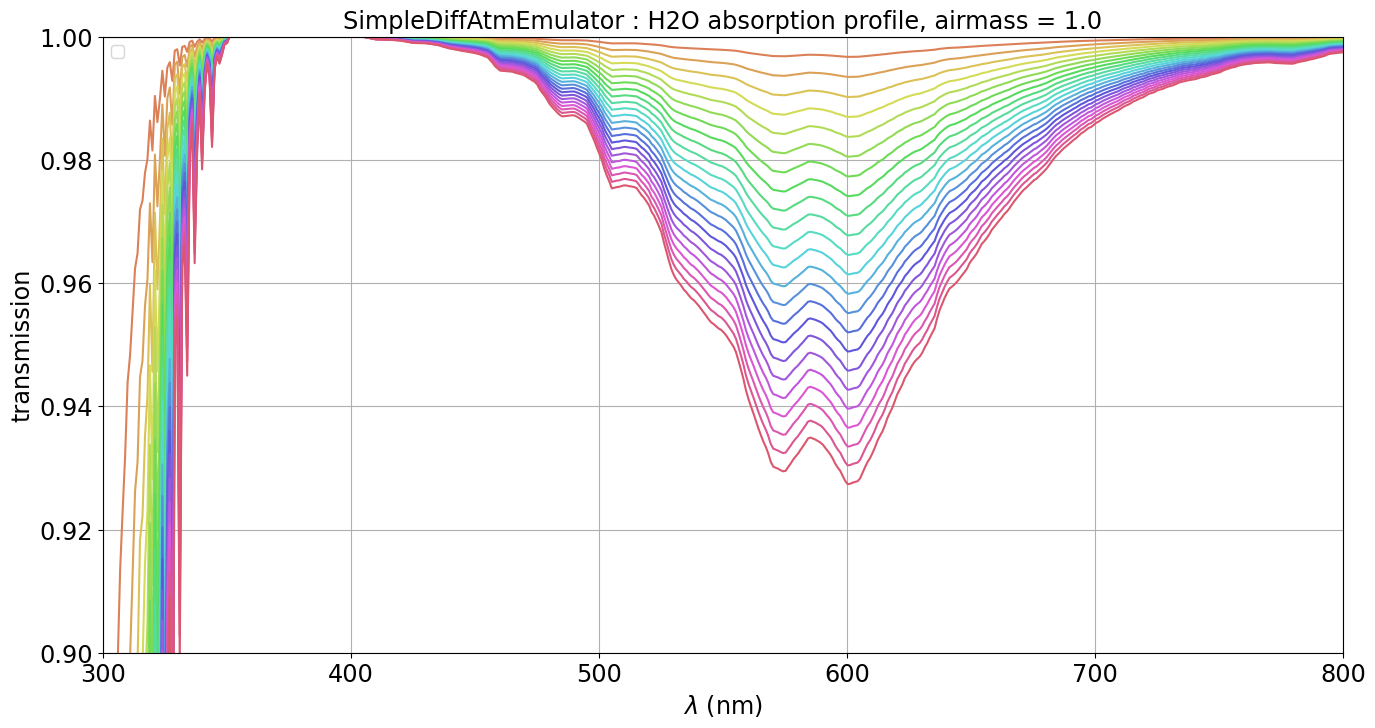

In [16]:
am =1

fig, ax = plt.subplots()

for idx,oz in enumerate(ozs):

    transm = emul.GetOZabsTransparency1DArray(WL,am,oz)
    ax.plot(WL,transm,color=hls_colors[idx])
    
itle = f"SimpleDiffAtmEmulator : Ozone absorption profile, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with combined ascattering and absorption process and check with libradtran

In [17]:
emul.get_flagprocesses()

{'flagRayleigh': True,
 'flagO2abs': True,
 'flagPWVabs': True,
 'flagOZabs': True,
 'flagAerosols': True}

In [18]:
am0 = 1.0
pwv0 = 5.0
oz0 = 500.
transm1 = emul.GetGriddedTransparencies1DArray(WL,am0,pwv0,oz0)
label1=f"emulator : airmass = {am0:.2f}, pwv  = {pwv0:.2f} mm , oz = {oz0:.1f} DU"

In [19]:
am1 = 2.0
pwv1 = 5.0
oz1 = 500.
transm2 = emul.GetGriddedTransparencies1DArray(WL,am1,pwv1,oz1)
label2=f"emulator : airmass = {am1:.2f},  pwv  = {pwv1:.2f} mm , oz = {oz1:.1f} DU"

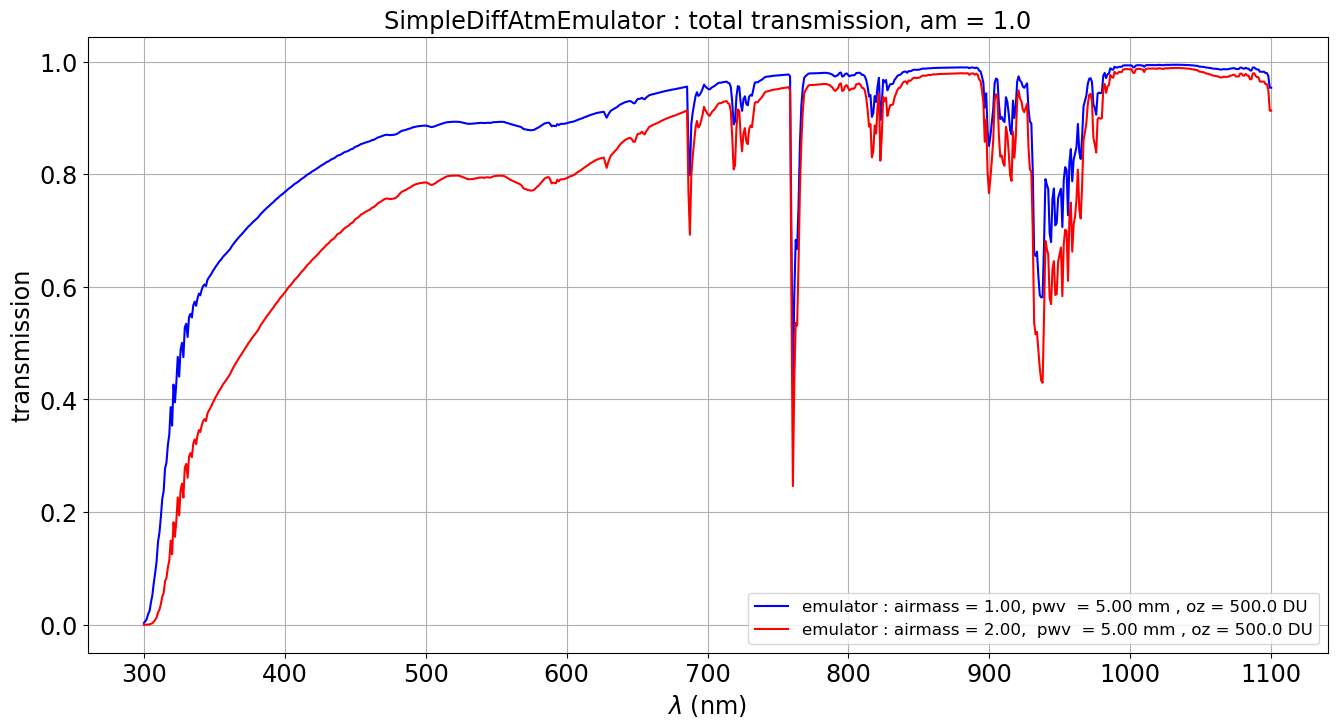

In [20]:
fig, ax = plt.subplots()

ax.plot(WL,transm1,'b-',label=label1)
ax.plot(WL,transm2,'r-',label=label2)

title = f"SimpleDiffAtmEmulator : total transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()


## Check with aerosols

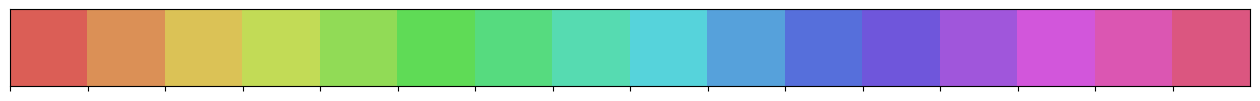

In [21]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

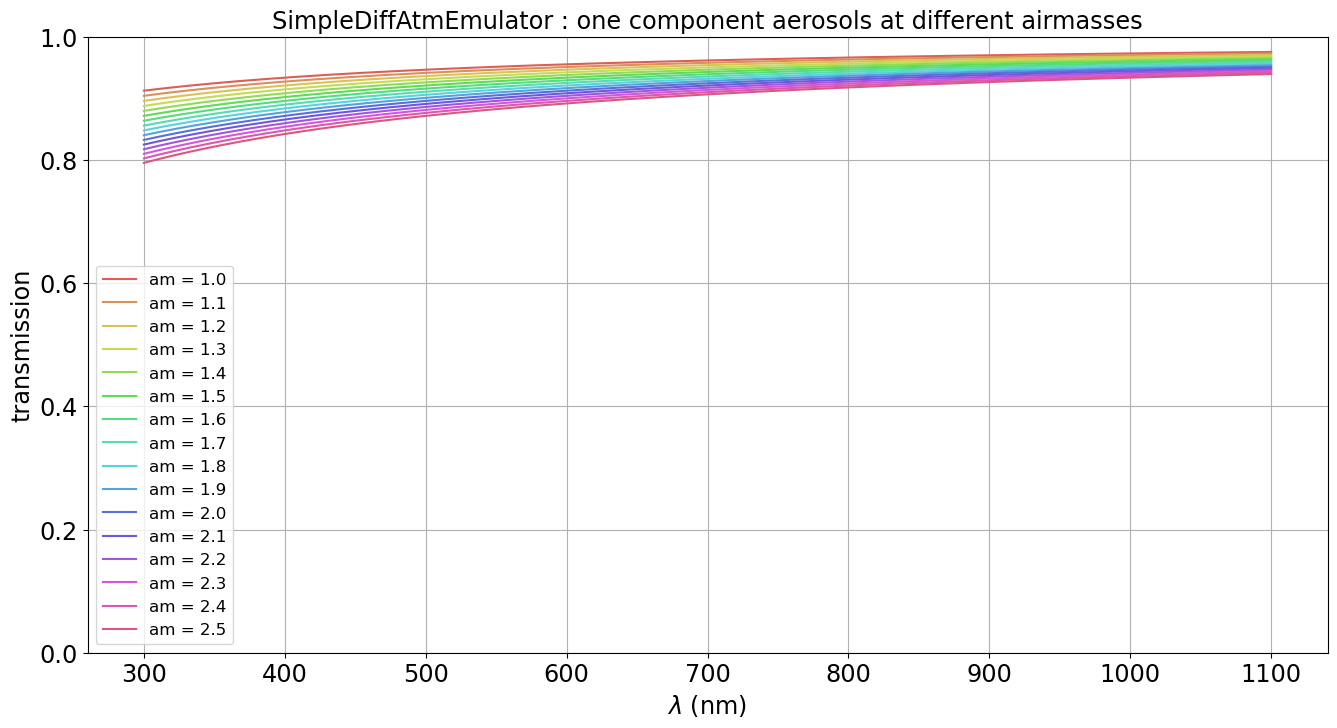

In [22]:
tau = 0.05
beta = - 1.0

fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm = emul.GetAerosolsTransparencies1DArray(WL,am,tau,beta)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : one component aerosols at different airmasses"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

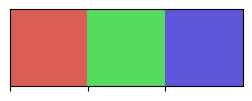

In [23]:
all_taus = [0.01, 0.05, 0.1]
beta = - 1.0
am=1

NTAUS = len(all_taus)

hls_colors = sns.color_palette("hls", NTAUS)
sns.palplot(hls_colors)

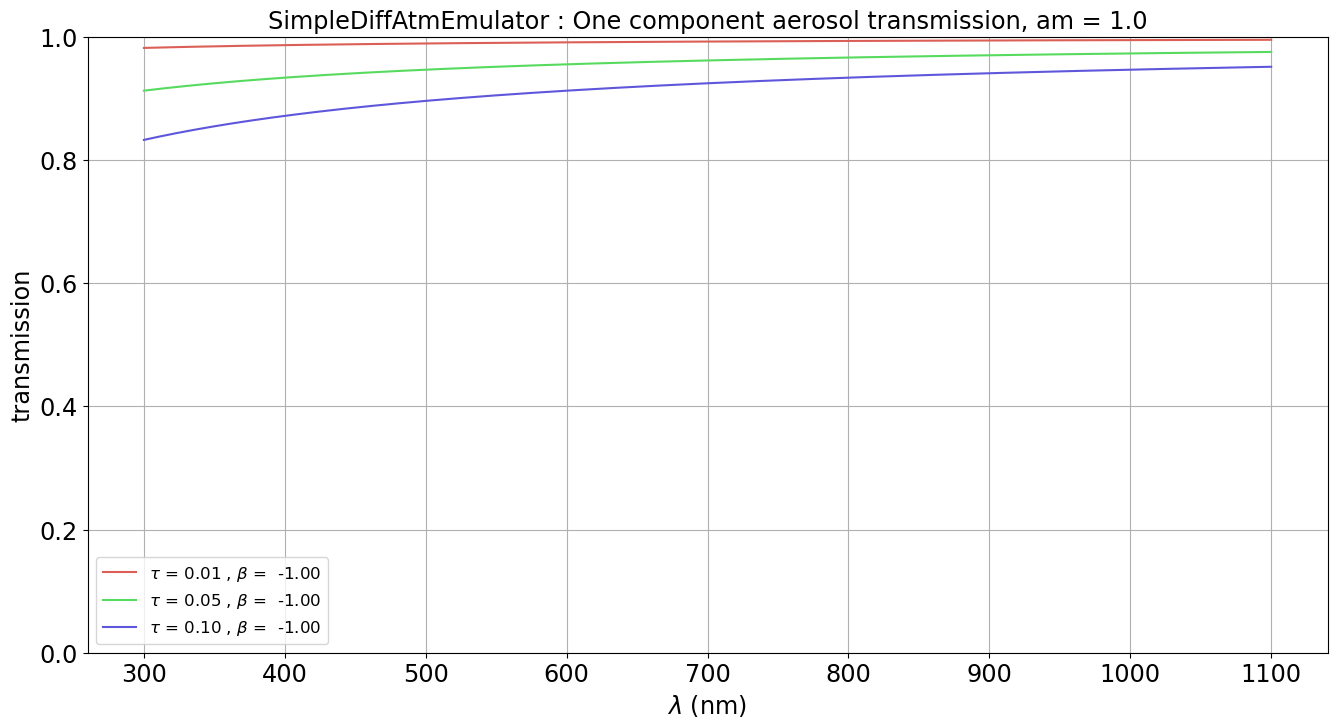

In [24]:
am  = 1

fig, ax = plt.subplots()
for idx,tau in enumerate(all_taus):
    label = f"$\\tau$ = {tau:.2f} , $\\beta$ =  {beta:.2f}"
    transm = emul.GetAerosolsTransparencies1DArray(WL,am,tau,beta)
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : One component aerosol transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Test all combined transmission

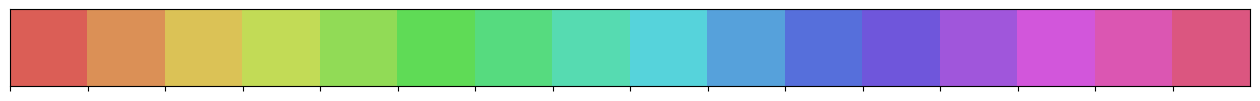

In [25]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

### Without aerosols

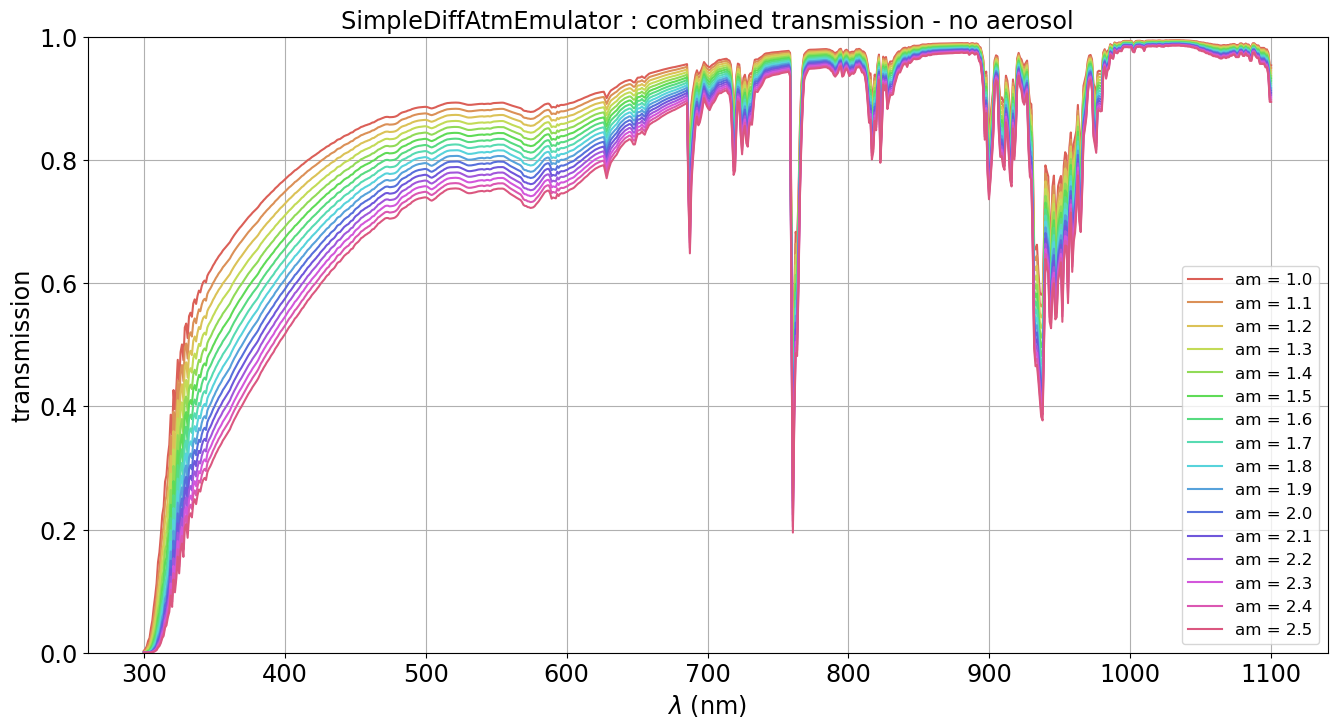

In [26]:
pwv0 = 5.0
oz0 = 500.

fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies1DArray(WL,am,pwv0,oz0)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : combined transmission - no aerosol"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

### With aerosols

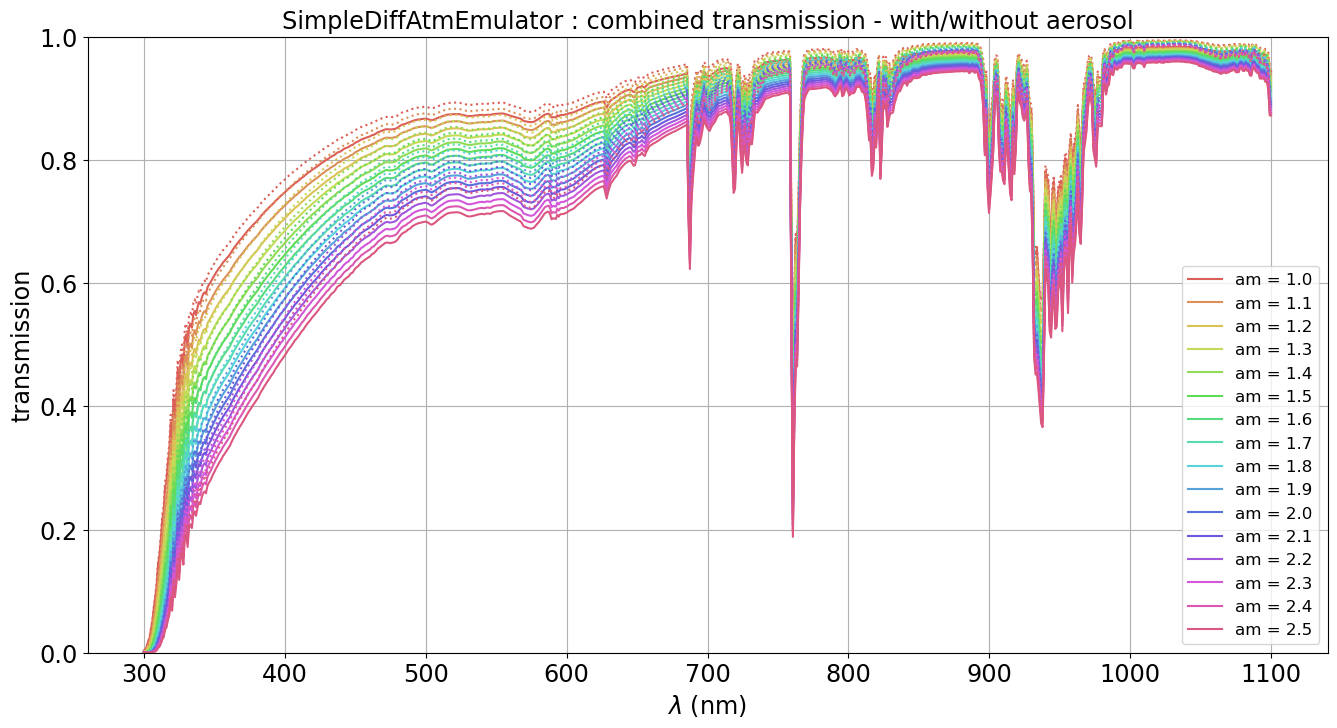

In [27]:
wv0 = 5.0
oz0 = 500.
tau= 0.02
beta = -1

fig, ax = plt.subplots()

for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies1DArray(WL,am,pwv0,oz0, tau=tau, beta=beta)
    transmnoaer = emul.GetAllTransparencies1DArray(WL,am,pwv0,oz0)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label = label)
    ax.plot(WL,transmnoaer,":",color=hls_colors[idx])
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : combined transmission - with/without aerosol"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()